In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

from fbprophet import Prophet

Forecasting without COVID-19 data

In [ ]:
odf = pd.read_excel('Unemployment_Rate_India_1991-2019.xlsx')
odf = odf.rename(columns = {"Year": "ds","Unemployment Rate":"y"})
odf['ds']=pd.to_datetime(odf['ds'], yearfirst=True)


In [13]:
new_odf=odf.set_index('ds').resample('M').interpolate(method='linear', axis=0, limit=None, inplace=False, limit_direction='forward', limit_area=None, downcast=None).reset_index()

In [ ]:
new_odf

In [15]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=337)
m.fit(new_odf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


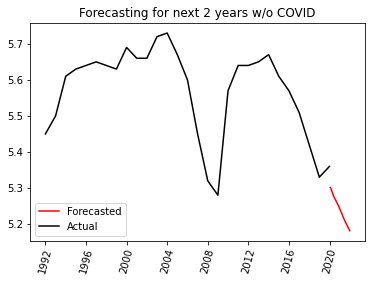

In [16]:
## For nest two years
future2 = m.make_future_dataframe(periods=24, freq='M', 
                                include_history=False)
forecast2 = m.predict(future2)
#forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

plt.plot(forecast2['ds'], forecast2['yhat'], color='red')
plt.plot(odf['ds'], odf['y'], color='k')
plt.xticks(rotation=75)
plt.title("Forecasting for next 2 years w/o COVID")
plt.legend(['Forecasted','Actual' ])

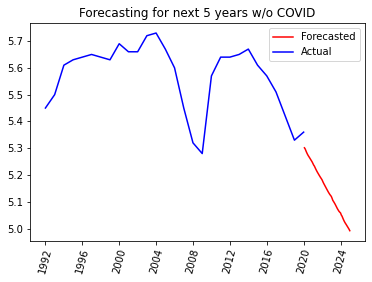

In [17]:
## For next 5 years
future5 = m.make_future_dataframe(periods=60, freq='M', 
                              include_history=False)
forecast5 = m.predict(future5)
#forecast5[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

plt.plot(forecast5['ds'], forecast5['yhat'], color='red')
plt.plot(odf['ds'], odf['y'], color='blue')
plt.xticks(rotation=75)
plt.title("Forecasting for next 5 years w/o COVID")
plt.legend(['Forecasted','Actual' ])

Forcast With Effect of Covid-19

Forcast for Next 2 years

In [25]:
df = pd.read_csv("Monthly_Unemployment_1991-2020.csv")
df['ds']=pd.to_datetime(df['ds'], yearfirst=True)

In [26]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=344)
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:
future = m.make_future_dataframe(periods=29, freq='M', 
                                include_history=False)

In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
5,2021-01-31,8.258314,6.245244,10.283012
6,2021-02-28,8.400294,6.556619,10.294060
7,2021-03-31,8.451511,6.565323,10.320162
8,2021-04-30,9.912066,7.908808,11.743733
9,2021-05-31,9.982879,8.079592,11.963130
10,2021-06-30,8.702785,6.709627,10.612664
11,2021-07-31,8.357237,6.402330,10.246487
12,2021-08-31,8.741857,6.799026,10.687038
13,2021-09-30,8.806436,6.970969,10.738106
14,2021-10-31,8.879696,6.908879,10.812825


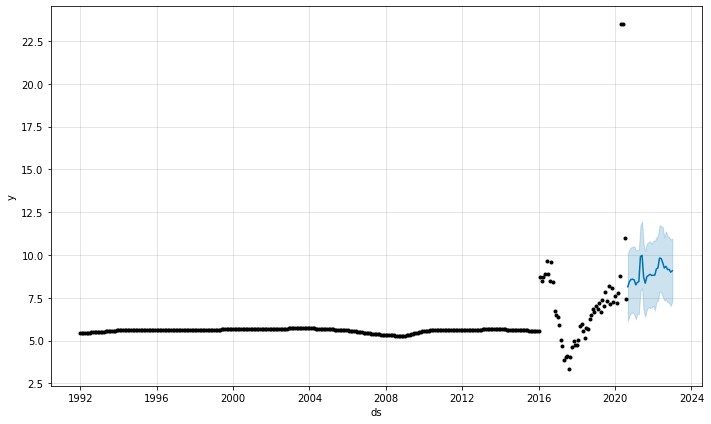

In [6]:
fig1 = m.plot(forecast)

(array([737699., 737791., 737881., 737972., 738064., 738156., 738246.,
        738337., 738429., 738521.]),
 <a list of 10 Text major ticklabel objects>)

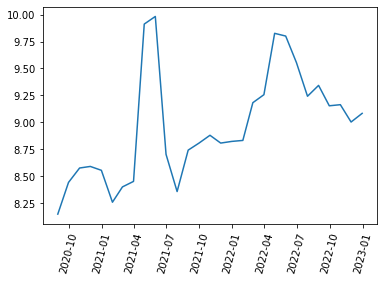

In [7]:
plt.plot(forecast['ds'], forecast['yhat'])
plt.xticks(rotation=75)

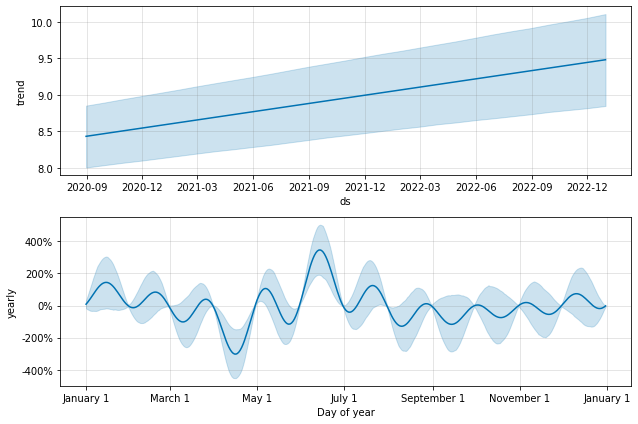

In [8]:
fig2 = m.plot_components(forecast)

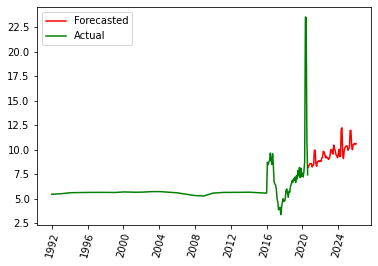

In [32]:

plt.plot(forecast['ds'], forecast['yhat'], color='red')
plt.plot(df['ds'], df['y'], color='green')
plt.xticks(rotation=75)
plt.legend(['Forecasted','Actual' ])

Forcast for next 5 years

In [27]:
future5 = m.make_future_dataframe(periods=65, freq='M', 
                                include_history=False)


In [28]:
forecast = m.predict(future5)
forecast.to_csv()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
41,2024-01-31,10.027703,8.053138,12.151907
42,2024-02-29,9.308350,7.254495,11.296402
43,2024-03-31,9.330100,7.183305,11.256940
44,2024-04-30,12.095685,9.949519,14.420790
45,2024-05-31,12.227591,10.024921,14.421364
46,2024-06-30,9.500749,7.529873,11.578847
47,2024-07-31,9.085246,6.965002,11.111264
48,2024-08-31,9.917390,7.864086,12.033124
49,2024-09-30,10.220806,8.016414,12.324545
50,2024-10-31,10.358705,8.296521,12.567245


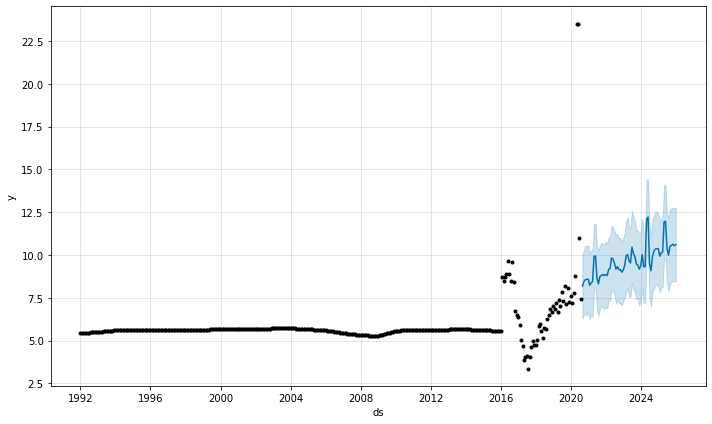

In [29]:
fig1 = m.plot(forecast)

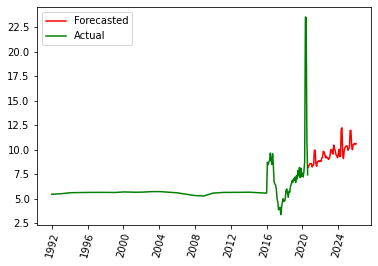

In [31]:
plt.plot(forecast['ds'], forecast['yhat'], color='red')
plt.plot(df['ds'], df['y'], color='green')
plt.xticks(rotation=75)
plt.legend(['Forecasted','Actual' ])

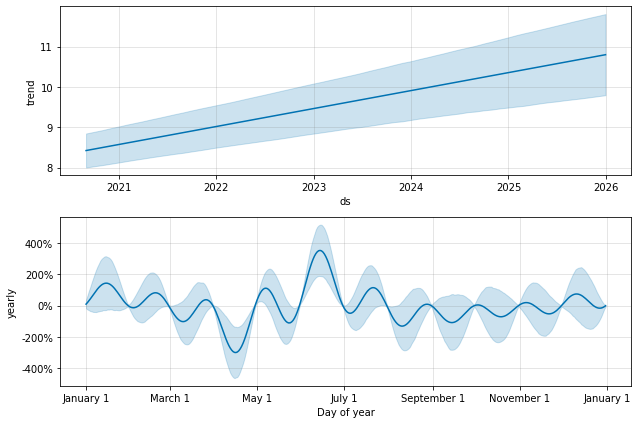

In [33]:
fig2 = m.plot_components(forecast)